# Data Analysis Interview Challenge

Bradley Mensah


Springboard Data Science Track, Nov 2020 Cohort

## Context


Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

## Part 1: Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15 minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import calendar

In [2]:
login_df = pd.read_json("logins.json")
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
login_df.shape

(93142, 1)

In [4]:
type(login_df.login_time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
# find first (oldest) login instance
min(login_df.login_time)

Timestamp('1970-01-01 20:12:16')

In [6]:
# find last (most recent) login instance
max(login_df.login_time)

Timestamp('1970-04-13 18:57:38')

In [7]:
# check for missing values
print(login_df.isna().any())
print(login_df.isnull().any())

login_time    False
dtype: bool
login_time    False
dtype: bool


In [8]:
# add a column of 1s called count
login_df["count"] = 1

# aggregate login counts based on 15 minute intervals
df_15min = login_df.set_index("login_time").resample('15T').sum()

### Visualize Login Data Across All Dates

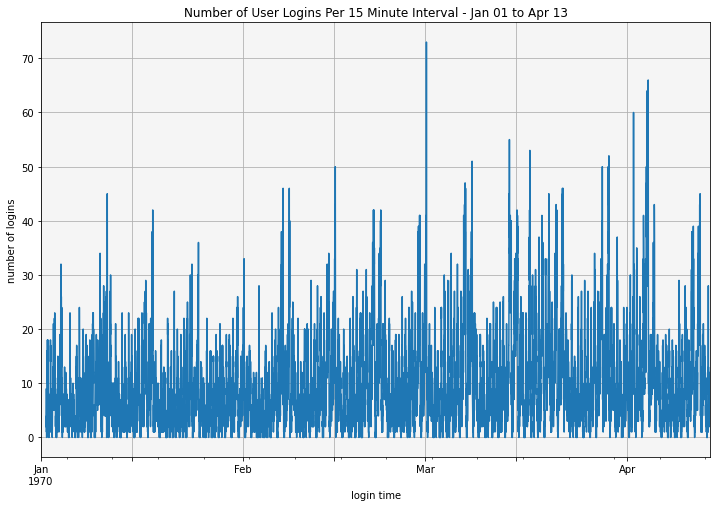

In [9]:
# plot a line graph
import matplotlib.pyplot as plt

# set graph size and plot data
fig, ax = plt.subplots(figsize=(12,8))
df_15min.plot(ax=ax, legend=None)

# set graph background color and grid
ax.set_facecolor("whitesmoke")
ax.grid()

# set margins, axes, labels, and title
plt.xticks(["1970-01-01", "1970-01-15", "1970-02-01", "1970-02-15", "1970-03-01", "1970-03-15", "1970-04-01"])
plt.xlabel("login time")
plt.ylabel("number of logins")
plt.title("Number of User Logins Per 15 Minute Interval - Jan 01 to Apr 13")
plt.show();

### Insights:
* There appears to be a pattern of spikes and dips
* The most active month was March 

In [10]:
# find demand on the busiest day
login_df.resample("D", on="login_time").sum().sort_values(by="count", ascending=False).head(1)

,count
login_time,
1970-04-04,1889


In [11]:
# find demand on the slowest day 
login_df.resample("D", on="login_time").sum().sort_values(by="count").head(1)

,count
login_time,
1970-01-01,112


In [12]:
# make data frame to find demand on slowest day, busiest day, and average over all days
dt_df = df_15min.reset_index()
dt_df["time"] = dt_df["login_time"].dt.time
dt_df["date"] = dt_df["login_time"].dt.date
dt_df = pd.pivot_table(data=dt_df, columns="date", index="time", values="count")
dt_df.fillna(0, inplace=True)
dt_df.shape

(96, 103)

In [13]:
dt_df.head()

date,1970-01-01,1970-01-02,1970-01-03,1970-01-04,1970-01-05,1970-01-06,1970-01-07,1970-01-08,1970-01-09,1970-01-10,...,1970-04-04,1970-04-05,1970-04-06,1970-04-07,1970-04-08,1970-04-09,1970-04-10,1970-04-11,1970-04-12,1970-04-13
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.0,10.0,5.0,11.0,8.0,7.0,9.0,8.0,23.0,16.0,...,31.0,12.0,6.0,14.0,6.0,18.0,17.0,31.0,17.0,12.0
00:15:00,0.0,18.0,10.0,14.0,3.0,4.0,11.0,16.0,20.0,13.0,...,39.0,22.0,6.0,10.0,12.0,7.0,15.0,27.0,27.0,8.0
00:30:00,0.0,12.0,7.0,15.0,7.0,7.0,5.0,8.0,20.0,15.0,...,53.0,36.0,6.0,16.0,10.0,16.0,21.0,17.0,35.0,8.0
00:45:00,0.0,13.0,17.0,12.0,4.0,7.0,4.0,11.0,10.0,14.0,...,50.0,30.0,8.0,15.0,9.0,12.0,21.0,17.0,24.0,4.0
01:00:00,0.0,9.0,13.0,7.0,7.0,8.0,5.0,9.0,17.0,16.0,...,54.0,17.0,4.0,9.0,13.0,21.0,19.0,20.0,26.0,6.0


### Visualizing Login Data by Day

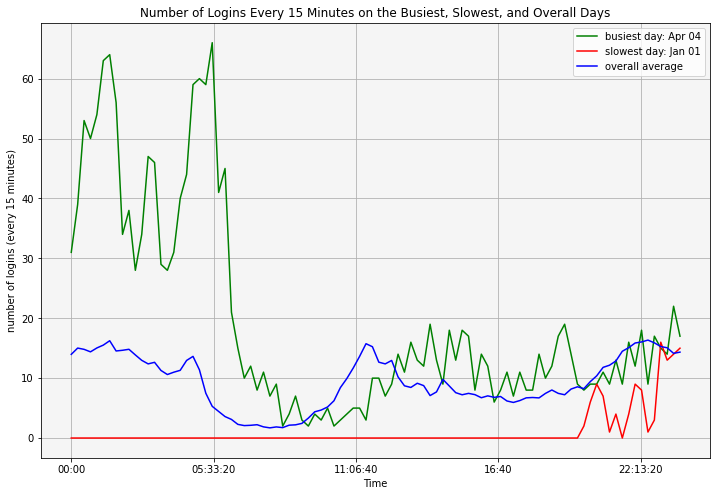

In [14]:
# set graph size
fig, ax = plt.subplots(figsize=(12,8))

# plot line graph of busiest day in the dataset
dt_df[datetime.date(1970,4,4)].plot(ax=ax, color="green")

# plot line graph of slowest day in the dataset
dt_df[datetime.date(1970,1,1)].plot(ax=ax, color="red")

# plot line graph of average over all days in dataset
dt_df.T.mean().plot(ax=ax, color="blue")

# set graph background color and grid
ax.set_facecolor("whitesmoke")
ax.grid()

# set margins, axes, labels, and title
ax.legend(["busiest day: Apr 04", "slowest day: Jan 01", "overall average"])
plt.xlabel("Time")
plt.ylabel("number of logins (every 15 minutes)")
plt.title("Number of Logins Every 15 Minutes on the Busiest, Slowest, and Overall Days")
plt.show();

### Insights:
* The busiest day had a lot of logins in the early morning hours, while overall, most logins are in the afternoon.
* On the slowest day, there were no logins recorded until the late evening. This may be an error, and in a professional setting I would consult with the data source to determine how this data was extracted.

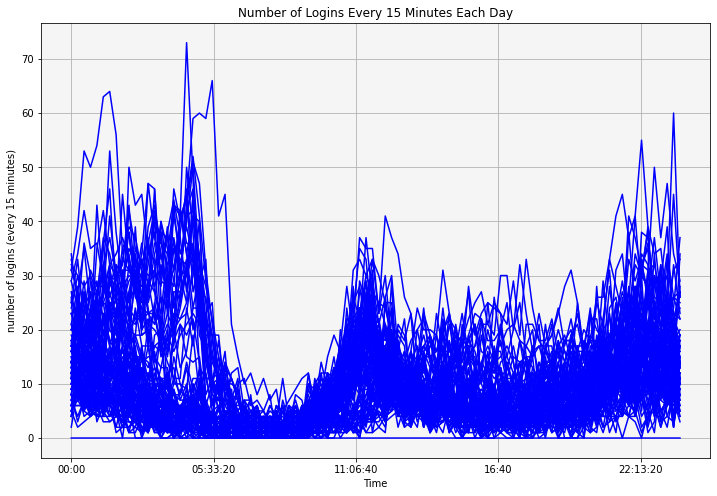

In [15]:
# graph demand on every day in dataset
# set graph size
fig, ax = plt.subplots(figsize=(12,8))

dt_df.plot(ax=ax, legend=None, color="blue")

# set graph background color and grid
ax.set_facecolor("whitesmoke")
ax.grid()

# set labels, and title
plt.xlabel("Time")
plt.ylabel("number of logins (every 15 minutes)")
plt.title("Number of Logins Every 15 Minutes Each Day")
plt.show();

### Insights:
* The days follow a generally consistent pattern, with some outliers.
* The most popular times are the early morning, afternoon, and late evening.

### Visualize Login Data by Month

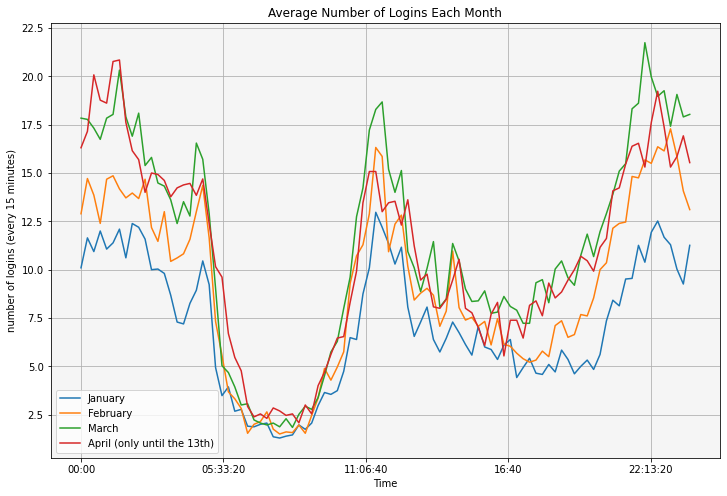

In [16]:
# set graph size
fig, ax = plt.subplots(figsize=(12,8))

# group data by month and plot
month_df = dt_df.T.reset_index()
month_df["date"] = pd.to_datetime(dt_df.T.reset_index().date, format="%Y-%m-%d")
month_df.resample("M", on="date").mean().T.plot(ax=ax)

# set graph background color and grid
ax.set_facecolor("whitesmoke")
ax.grid()

# set margins, axes, labels, and title
ax.legend(["January", "February", "March", "April (only until the 13th)"])
plt.xlabel("Time")
plt.ylabel("number of logins (every 15 minutes)")
plt.title("Average Number of Logins Each Month")
plt.show();

### Insights:
* The average number of logins each month has been increasing since January
* The login trends are consistent month to month: there is a lot of activity in the early morning just after midnight, followed by spikes again in the afternoon and nighttime
* The data for April only goes until April 13th. With more data, it is possible that the average number of logins for April would surpass that of March. However, with the data we have, March appears to be the most active month. 

### Visualize Login Data by Day of the Week

In [17]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
weekday_df = login_df.groupby(login_df.login_time.dt.day_name()).sum().reindex(days)
weekday_df.T

login_time,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,8823,9268,10339,11960,15208,19377,18167


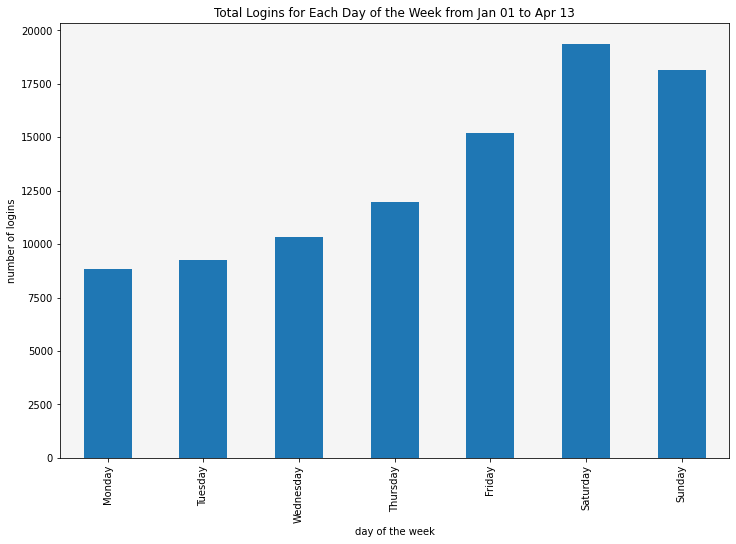

In [18]:
# set graph size and plot bar graph of logins per day of the week
fig, ax = plt.subplots(figsize=(12,8))
weekday_df.plot(kind="bar", ax=ax, legend=None)

# set graph background color
ax.set_facecolor("whitesmoke")

# set margins, axes, labels, and title
plt.xlabel("day of the week")
plt.ylabel("number of logins")
plt.title("Total Logins for Each Day of the Week from Jan 01 to Apr 13")
plt.show();

In [19]:
wk_df = dt_df.T.reset_index()
wk_df["date"] = pd.to_datetime(wk_df["date"], format="%Y-%m-%d")
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
wk_df = wk_df.groupby(wk_df.date.dt.day_name()).sum().reindex(days)

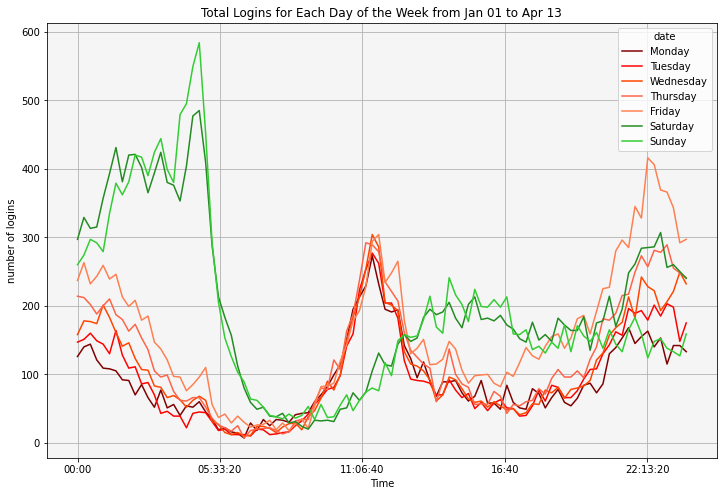

In [20]:
# set graph size and plot line graph of logins per day of the week across time
fig, ax = plt.subplots(figsize=(12,8))
wk_df.T.plot(ax=ax, color=["maroon","red","orangered","tomato","coral","forestgreen", "limegreen"])

# set graph background color and grid
ax.set_facecolor("whitesmoke")
ax.grid()

# set labels and title
plt.xlabel("Time")
plt.ylabel("number of logins")
plt.title("Total Logins for Each Day of the Week from Jan 01 to Apr 13")
plt.show();

### Insights:
* Demand on the weekend (green) is quite different from demand on the weekdays (red). There are a larger number of logins in the early hours of the morning on weekends.
* There are also more total logins on the weekends.
* Demand on the weekdays is quite consistent, with a slight uptick in demand at nighttime on Fridays.
* While demand spikes in the afternoon on weekdays, it dips sharply on weekends. 

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment

    b. what statistical test(s) you will conduct to verify the significance of the observation
    
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

1. I would choose a decrease in waiting times on weekdays as the key indicator that this experiment has been a success. The problem is that while most of the demand is in Gotham on weekday nights, and most of the demand is in Metropolis on weekday daytimes, the supply (driver partners) is split between the two and therefore we are unable to properly meet demand. This solution allows Ultimate to properly allocate resources to meet service demands promptly. This project will be deemed a success if the average waiting time on weekdays decreases in both Metropolis and Gotham. 

2. 
    a. I would extract data from the previous month on customer wait times during the daytime on weekdays in Metropolis, and during the nighttime on weekdays in Gotham. Then, I would establish the toll reimbursement program for driver partners and record wait times for a month. Finally, I would look at the difference in wait times between the two months and determine if the toll reimbursement program led to a decrease in wait times. If the first month is successful, I would continue to look at data for two more months to determine consistency of results. 
    
    b. I would perform a p-value test to determine statistical significance. 
    
    c. If there is a decrease in wait times, I would conclude that the experiment was a success: reimbursing driver partners for tolls does lead to more drivers servicing both cities during peak hours, leading to a decrease in wait times. My recommendation would be to implement the toll reimbursement system. The only caveat would be that supply could overwhelm demand. Continued data monitoring should be done to look out for such a possibility. 

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. 

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

#### Data description
* __city__: city this user signed up in
* __phone__: primary device for this user
* __signup_date__: date of account registration; in the form ‘YYYY MM DD’
* __last_trip_date__: the last time this user completed a trip; in the form ‘YYYY MM DD’
* __avg_dist__: the average distance in miles per trip taken in the first 30 days after signup
* __avg_rating_by_driver__: the rider’s average rating over all of their trips
* __avg_rating_of_driver__: the rider’s average rating of their drivers over all of their trips
* __surge_pct__: the percent of trips taken with surge multiplier > 1
* __avg_surge__: The average surge multiplier over all of this user’s trips
* __trips_in_first_30_days__: the number of trips this user took in the first 30 days after
signing up
* __ultimate_black_user__: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
* __weekday_pct__: the percent of the user’s trips occurring during a weekday

### Data Exploration and Cleaning

In [21]:
riders_df = pd.read_json("ultimate_data_challenge.json")
riders_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [22]:
riders_df.shape

(50000, 12)

In [23]:
riders_df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [24]:
# fill in missing average ratings with the overall average rating both of and by driver
riders_df["avg_rating_of_driver"].fillna((riders_df["avg_rating_of_driver"]).mean(), inplace=True)
riders_df["avg_rating_by_driver"].fillna((riders_df["avg_rating_by_driver"]).mean(), inplace=True)

# drop phone number column, as it is not important for our predictions
riders_df.drop("phone", axis=1, inplace=True)

# check na again
riders_df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [25]:
# check dtypes
riders_df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [26]:
# change date columns to datetime objects
riders_df = riders_df.astype({"signup_date":"datetime64[ns]", "last_trip_date":"datetime64[ns]"})
riders_df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

Adding boolean column "is_churn". 

* False: riders who have had a ride within the past 30 days (riders who have been retained)

* True: riders who have NOT had a ride within the past 30 days (riders who have churned)

Since the date that the data was pulled is not given, I will assume that the most recent date of the "last trip date" column is when the data was pulled.

In [27]:
# find the most recent date in "last_trip_date"
pull_date = max(riders_df["last_trip_date"])
pull_date

Timestamp('2014-07-01 00:00:00')

The most recent trip was on July 1st 2014, so I will assume that is when the data was pulled. I will mark riders whose last trip was before June 1st 2014 (30 days before the pull date) as churn. 

In [28]:
riders_df["is_churn"] = riders_df["last_trip_date"]<"2014-06-01"
riders_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_churn
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,False
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,True
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,True
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,False
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,True


### Exploratory Data Analysis

In [29]:
# percentage of users who were retained
pct_retained = (riders_df.is_churn.value_counts()[False] / riders_df.shape[0])*100
print("{:.2f}% of users were retained.".format(pct_retained))

37.61% of users were retained.


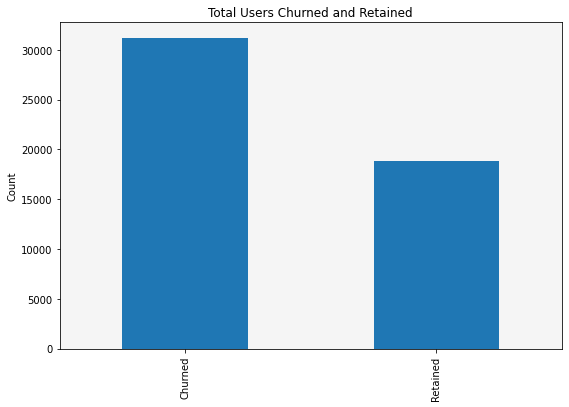

In [30]:
# bar chart of users churned and retained
fig, ax = plt.subplots(figsize=(9,6))
riders_df.is_churn.value_counts().plot(kind="bar", ax=ax, legend=None)
ax.set_facecolor("whitesmoke")
ax.set_xticklabels(["Churned", "Retained"])
plt.ylabel("Count")
plt.title("Total Users Churned and Retained")
plt.show();

#### Insights:
* More users churned than were retained. 
* Significantly more users churned than were retained, so it may be helpful to choose hyperparameters that adjust for class imbalance when training a classification model. 

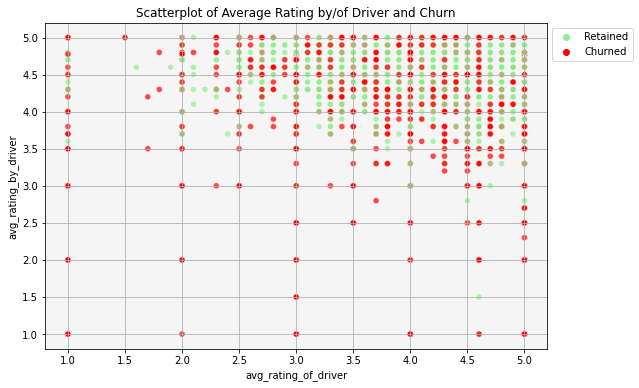

In [31]:
# ratings scatterplot
fig, ax = plt.subplots(figsize=(9,6))
sns.scatterplot(data=riders_df, x="avg_rating_of_driver", y="avg_rating_by_driver", 
                palette=["lightgreen", "red"], alpha=0.7, hue="is_churn", ax=ax)
ax.set_facecolor("whitesmoke")
ax.grid()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ["Retained", "Churned"], bbox_to_anchor=(1,1))
plt.title("Scatterplot of Average Rating by/of Driver and Churn")
plt.show();

#### Insights:
* Every rider who rated drivers 3.0 or lower and was rated by drivers 3.0 or lower did not use the service in the past 30 days (churned).
* Above 3.0, a strong difference between riders who churn and riders who are retained does not appear.

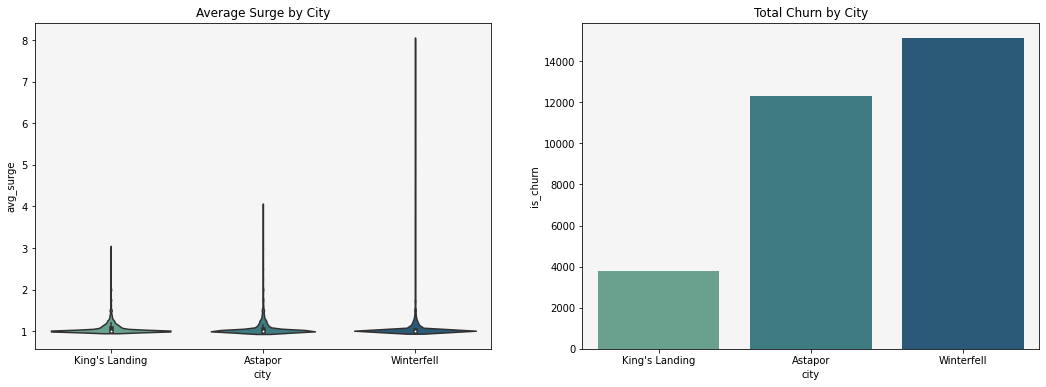

In [32]:
# Average surge by city
fig, axs = plt.subplots(1,2,figsize=(18,6))
sns.violinplot(data=riders_df, x="city", y="avg_surge", palette="crest", ax=axs[0])
axs[0].set_facecolor("whitesmoke")
axs[0].set_title("Average Surge by City")

# Total churn by city
churn_by_city = pd.DataFrame(riders_df.groupby(by="city").is_churn.sum()).reset_index().sort_values("is_churn")
sns.barplot(data=churn_by_city, x="city", y="is_churn", palette="crest", ax=axs[1])
axs[1].set_facecolor("whitesmoke")
axs[1].set_title("Total Churn by City")
plt.show();

#### Insights:
* Riders in Winterfell suffered the higher average surges than those in King's Landing and Astapor.
* There is a direct relationship with churn and the average surge in each city. 

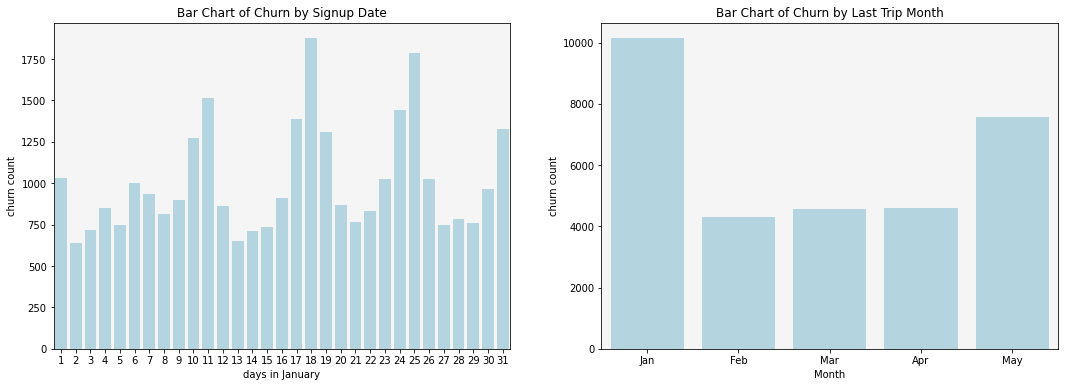

In [33]:
# dataframe of churn by signup date
signup = pd.DataFrame(riders_df.groupby(by="signup_date").is_churn.sum()).reset_index()
signup["signup_date"] = signup["signup_date"].dt.day

# dataframe of churn by last ride month
lastride = riders_df[["last_trip_date", "is_churn"]]
lastride = lastride.set_index("last_trip_date").resample("M").sum().reset_index()
lastride["last_trip_month"] = lastride["last_trip_date"].dt.month.apply(lambda x: calendar.month_abbr[x])
lastride.drop("last_trip_date", axis=1, inplace=True)
lastride = lastride[~lastride.last_trip_month.isin(["Jun", "Jul"])]

# plot bar charts
fig, axs = plt.subplots(1,2,figsize=(18,6))

# sign up date chart
sns.barplot(data=signup, x="signup_date", y="is_churn", palette=["lightblue"], ax=axs[0])
axs[0].set_facecolor("whitesmoke")
axs[0].set_title("Bar Chart of Churn by Signup Date")
axs[0].set_xlabel("days in January")
axs[0].set_ylabel("churn count")

# last ride month chart
sns.barplot(data=lastride, x="last_trip_month", y="is_churn", palette=["lightblue"], ax=axs[1])
axs[1].set_facecolor("whitesmoke")
axs[1].set_title("Bar Chart of Churn by Last Trip Month")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("churn count")

plt.show();

#### Insights:
* Users who signed up on January 17th, 25th, and 11th churned the most
* There are no clear predictive trends that show a relationship between signup date and likelyhood of churning. 
* The most churn was within the first month of the service. There was a slight uptick in churn from February to March, and a significant increase in May. The number of users retained month to month has been decreasing since February. 

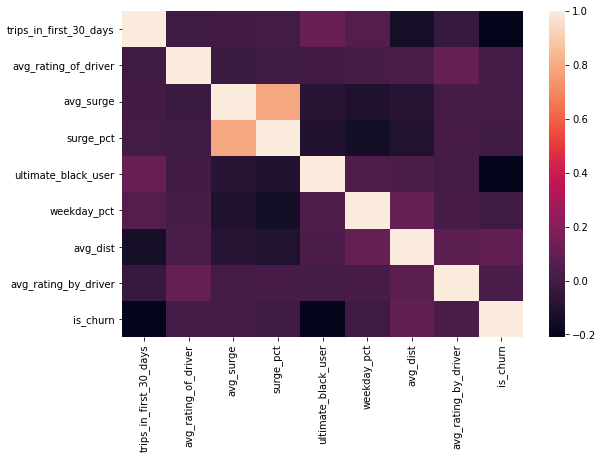

In [34]:
plt.subplots(figsize=(9,6))
sns.heatmap(riders_df.corr());

#### Insights:
* There is not a strong correlation between churn and any of the numerical features. 
* The average surge and the surge percent are the only two features with significant correlation, but this is a given. 

### Preprocessing

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, classification_report

In [36]:
riders_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_churn
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,False
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,True
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,True
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,False
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,True


To preprocess this data so that it can be fed to a model, we will:
1. Create a feature called "days of service" that is equal to the "last_trip_date" minus the "signup_date" to preserve some data from the date features
2. Encode boolean feature "ultimate_black_user" as 0s and 1s
3. Drop the date columns "signup_date" and "last_trip_date"
4. Encode "city" using one-hot encoding
4. Standardize the numerical data so that the orders of magnitude difference between features will not affect our results. 

In [37]:
# create new feature "days_of_service"
riders_df["days_of_service"] = (riders_df["last_trip_date"] - riders_df["signup_date"]).dt.days

In [38]:
# separate data into features and target
X = riders_df.drop(["is_churn", "signup_date", "last_trip_date"], axis=1)
y = riders_df["is_churn"].astype(int).copy()

In [39]:
# train-test split with 0.3 testsize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# create a ColumnTransformer object to onehot encode categories/bools and scale numerical data
num_feats = riders_df.select_dtypes(include=["int64", "float64"]).columns.to_list()
transformer = ColumnTransformer(transformers=[("num", StandardScaler(), num_feats),
                                              ("cat", OneHotEncoder(), ["city"]),
                                              ("bool", OrdinalEncoder(), ["ultimate_black_user"])])

In [41]:
# fit-transform training data and transform test data
trans_X_train = transformer.fit_transform(X_train)
trans_X_test = transformer.transform(X_test)

# get column names into a list
column_names = num_feats.copy()
column_names.extend(list(OneHotEncoder().fit(np.array(X_train["city"]).reshape(-1,1)).get_feature_names()))
column_names.append("ultimate_black_user")

# create dataframes with transformed data
trans_X_train = pd.DataFrame(trans_X_train, columns=column_names)
trans_X_test = pd.DataFrame(trans_X_test, columns=column_names)
trans_X_train.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,days_of_service,x0_Astapor,x0_King's Landing,x0_Winterfell,ultimate_black_user
0,-0.339230,0.703330,-0.333651,-0.442572,-1.654848,3.167377,0.493653,-1.493690,1.0,0.0,0.0,0.0
1,-0.339230,-0.000166,-0.333651,-0.442572,-1.654848,0.342761,0.493653,-1.493690,1.0,0.0,0.0,1.0
2,-0.339230,0.703330,-0.333651,-0.442572,-1.654848,-0.223917,0.493653,-1.493690,1.0,0.0,0.0,0.0
3,0.723165,0.350205,0.696307,0.273545,-0.881178,-0.660767,-0.400847,1.336911,0.0,0.0,1.0,0.0
4,1.254363,0.526768,-0.333651,-0.442572,0.254980,-0.462518,0.270028,0.983086,0.0,1.0,0.0,1.0


In [42]:
num_feats

['trips_in_first_30_days',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver',
 'days_of_service']

### Training and Modeling

We will be using a Random Forest classifier to predict churn or renewal with accuracy as the primary metric and AUC-ROC as a secondary metric. First we will get the accuracy and AUC-ROC of a dummy classifier so that we have a baseline against which to compare our results. 

In [43]:
dummy_cls = DummyClassifier(strategy="most_frequent")
dummy_cls.fit(trans_X_train, y_train)
dummy_pred = dummy_cls.predict(trans_X_test)
accuracy_score(dummy_pred, y_test)

0.6252666666666666

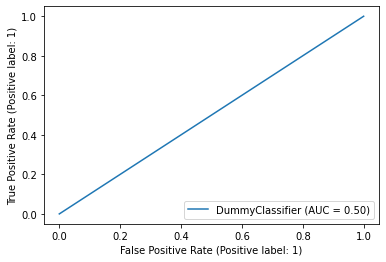

In [44]:
plot_roc_curve(dummy_cls, trans_X_test, y_test);

A dummy classifier that just chooses the most common class is 62.53% accurate and gets an AUC score of 0.50.

In [45]:
# instantiate, train, and predict using a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(trans_X_train, y_train)
y_pred = rf.predict(trans_X_test)
accuracy_score(y_pred, y_test)

0.9582

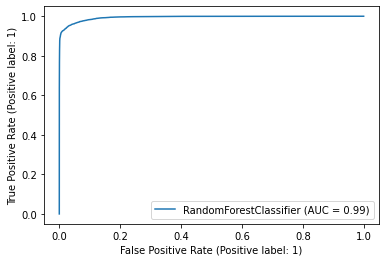

In [46]:
plot_roc_curve(rf, trans_X_test, y_test);

The Random Forest classifier out the box gets an accuracy of about 96% and an AUC-ROC of 0.99.

In [47]:
report = classification_report(y_test, y_pred, target_names=["Renew", "Churn"])
print(report)

              precision    recall  f1-score   support

       Renew       0.94      0.95      0.94      5621
       Churn       0.97      0.96      0.97      9379

    accuracy                           0.96     15000
   macro avg       0.95      0.96      0.96     15000
weighted avg       0.96      0.96      0.96     15000



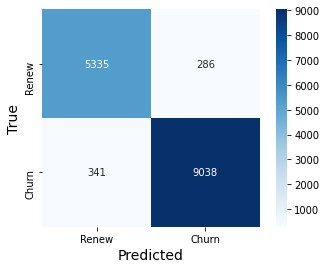

In [48]:
pl = confusion_matrix(y_test,y_pred)
label = ["Renew", "Churn"]
sns.heatmap(pl, annot=True, fmt='.6g', cmap='Blues', square=True, xticklabels=label, yticklabels=label)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
plt.show();

### Conclusions

Our model is highly accurate, with 96% of users being correctly predicted to churn or be retained. 

Ultimate can leverage these results to know up to six months in advance which users will churn and which ones will be retained with a high level of accuracy. By knowing this, they will be able to make interventions for users at risk of churn through advertising, special programs, or discounts in order to prevent churn. By retaining more users, Ultimate will be able to increase revenue. 